https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=W4V4RXJMRA26KHOT&outputsize=full
Stock Data for AAPL on 2025-02-28:
Open Price: 236.9500 USD
High Price: 242.0900 USD
Low Price: 230.2000 USD
Close Price: 241.8400 USD
Volume: 56833360


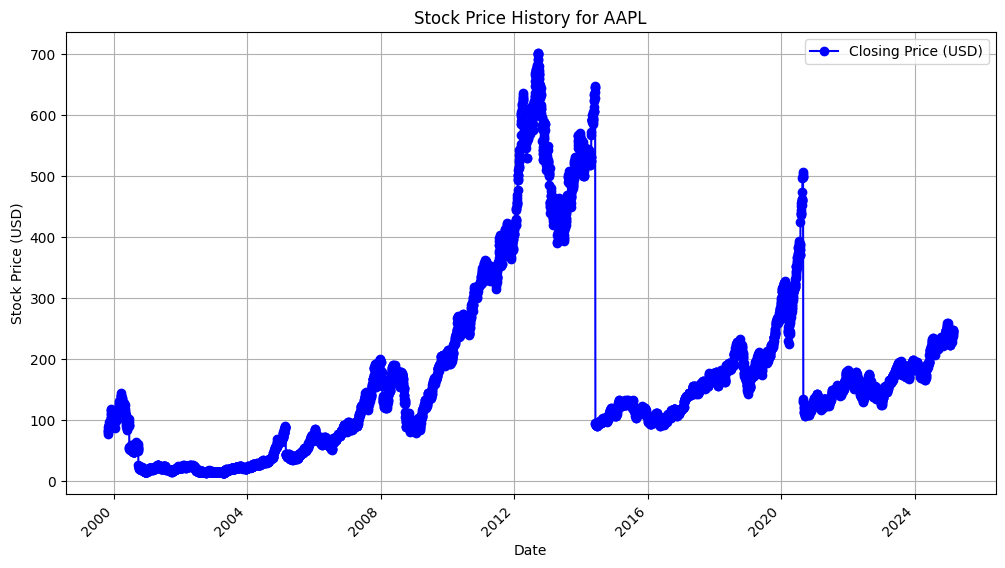

In [ ]:
import requests
import matplotlib.pyplot as plt
import datetime

def fetch_stock_data(symbol, api_key, date):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=full"
    response = requests.get(url)
    print(url)
    data = response.json()

    # Check for errors in the API response
    if "Time Series (Daily)" not in data:
        print(f"Error fetching stock data: {data.get('Note', 'Unknown error')}")
        return None

    return data["Time Series (Daily)"]

def display_stock_data(data, symbol, date):
    if data is None or date not in data:
        print(f"No data available for {symbol} on {date}")
        return

    stock_info = data[date]
    open_price = stock_info["1. open"]
    high_price = stock_info["2. high"]
    low_price = stock_info["3. low"]
    close_price = stock_info["4. close"]
    volume = stock_info["5. volume"]

    print(f"Stock Data for {symbol} on {date}:")
    print(f"Open Price: {open_price} USD")
    print(f"High Price: {high_price} USD")
    print(f"Low Price: {low_price} USD")
    print(f"Close Price: {close_price} USD")
    print(f"Volume: {volume}")

def plot_stock_prices(data, symbol, date):
    if data is None:
        return

    # Extract and sort dates
    sorted_dates = sorted(data.keys())
    prices = [float(data[d]["4. close"]) for d in sorted_dates]

    # Convert date strings to datetime objects for plotting
    dates = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in sorted_dates]

    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices, marker='o', linestyle='-', color='b', label='Closing Price (USD)')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.title(f'Stock Price History for {symbol}')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    symbol = "AAPL"  # Example: Apple stock
    api_key = "W4V4RXJMRA26KHOT"  # Replace with your Alpha Vantage API key
    date = "2025-02-28"  # Date for fetching stock data

    stock_data = fetch_stock_data(symbol, api_key, date)
    display_stock_data(stock_data, symbol, date)
    plot_stock_prices(stock_data, symbol, date)
